In [5]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/speeds/speed_"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [7]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [8]:
print("start time is {}".format(datetime.now()))
for i in range(index_start_point_file, index_end_point_file):
    type_of_ways_all_points = []
    path = BASE_PATH + str(index_folder) + "/" + str(i) + "_file_"+ str(i) + ".csv"
    
    data = read_data(path)
    TrafficEvents = data.append(TrafficEvents, ignore_index = True)
print("end time is {}".format(datetime.now()))

start time is 2020-09-08 17:32:27.874108
end time is 2020-09-08 17:34:03.037460


In [9]:
class Location(object):
    def __init__(self, osrm_data):
        self.longitude = osrm_data[0]
        self.latitude = osrm_data[1]

In [10]:
points = []

for index, data in TrafficEvents.iterrows():
    start_location = Location([data["StartPoint_Lng"], data["StartPoint_Lat"]])
    if "EndPoint_Lng" in data and "EndPoint_Lat" in data and not math.isnan(data["EndPoint_Lat"]):
        end_location = Location([data["EndPoint_Lng"], data["EndPoint_Lat"]])
    else:
        end_location = Location([data["StartPoint_Lng"], data["StartPoint_Lat"]])
            
    points.append(start_location)

In [11]:
locations = []
for point in points:
    randrange = random.randrange(0, 100)
    if randrange > 85:
        locations.append((point.latitude, point.longitude))


attractions_lats, attractions_lngs = zip(*locations)

In [12]:
apikey = ''
gmap = gmplot.GoogleMapPlotter(42.164798, -101.852231, 5, apikey=apikey)
gmap.scatter(attractions_lats, attractions_lngs, color='#0b30e6', size=4000, marker=False)
gmap.draw('scatter_map.html')

In [13]:
apikey = ''
gmap = gmplot.GoogleMapPlotter(42.164798, -101.852231, 5, apikey=apikey)
gmap.heatmap(attractions_lats, attractions_lngs)
gmap.draw('heatmap_map.html')

In [14]:
BBox = (TrafficEvents.StartPoint_Lng.min(), TrafficEvents.StartPoint_Lng.max(),      
         TrafficEvents.StartPoint_Lat.min(), TrafficEvents.StartPoint_Lat.max())

In [15]:
locations = []
for point in points:
    randrange = random.randrange(0, 100)
    if randrange > -1:
        locations.append((point.latitude, point.longitude))


attractions_lats, attractions_lngs = zip(*locations)


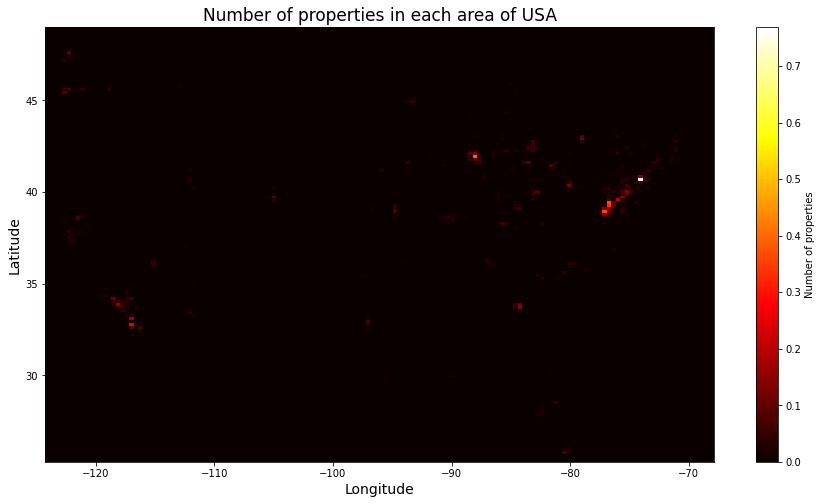

In [16]:
plt.figure(figsize = (15,8))
plt.hist2d(attractions_lngs, attractions_lats, bins=150, cmap='hot', density=True)
plt.colorbar().set_label('Number of properties')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Number of properties in each area of USA', fontsize=17)
plt.show()

In [17]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    print("end time is {}".format(datetime.now()))
    return df

In [18]:
df = None
for i in range(0,8):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-08 17:34:32.629196
end time is 2020-09-08 17:36:00.635871
1
start time is 2020-09-08 17:36:01.033433
end time is 2020-09-08 17:37:35.832634
2
start time is 2020-09-08 17:37:36.600824
end time is 2020-09-08 17:39:10.162304
3
start time is 2020-09-08 17:39:11.383215
end time is 2020-09-08 17:40:43.592885
4
start time is 2020-09-08 17:40:45.225159
end time is 2020-09-08 17:42:16.698013
5
start time is 2020-09-08 17:42:18.692079
end time is 2020-09-08 17:43:55.043563
6
start time is 2020-09-08 17:43:59.619146
end time is 2020-09-08 17:45:33.844061
7
start time is 2020-09-08 17:45:37.064465
end time is 2020-09-08 17:47:10.585206
9
start time is 2020-09-08 17:47:14.788186
end time is 2020-09-08 17:48:42.037700


In [107]:
df.head(-10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
0,M-12687617,MapQuest,Construction,641.0,3.0,32.886803,-117.227707,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [49751894, 60432369],...","{'waypoints': [{'nodes': [49751894, 60432369],...","[49751894, 60432369, 49750604, 48868427, 60432...","[49751894, 60432369, 49750604, 48868427, 60432...",motorway,-100.0,-100.0,-100.0
1,M-12687618,MapQuest,Construction,409.0,3.0,32.889870,-117.227951,NaN,NaN,0.43,...,False,False,"{'waypoints': [{'nodes': [5927121020, 59271210...","{'waypoints': [{'nodes': [5927121020, 59271210...","[5927121020, 5927121021, 5927121019, 592712102...","[5927121020, 5927121021, 5927121019, 592712102...",motorway_link,-100.0,-100.0,-100.0
2,M-12687619,MapQuest,Construction,406.0,3.0,32.903721,-117.224213,NaN,NaN,0.44,...,False,False,"{'waypoints': [{'nodes': [748689652, 748689632...","{'waypoints': [{'nodes': [748689652, 748689632...","[748689652, 748689632, 748689632, 748689621, 7...","[748689652, 748689632, 748689632, 748689621, 7...",motorway_link,-100.0,-100.0,-100.0
3,M-12687620,MapQuest,Construction,500.0,3.0,32.890144,-117.205894,NaN,NaN,2.31,...,False,False,"{'waypoints': [{'nodes': [288449874, 48926870]...","{'waypoints': [{'nodes': [288449874, 48926870]...","[288449874, 48926870, 48926851, 288449874, 469...","[288449874, 48926870, 48926851, 288449874, 469...",motorway,-100.0,-100.0,-100.0
4,M-12687621,MapQuest,Construction,409.0,2.0,32.992962,-117.083420,NaN,NaN,1.18,...,False,False,"{'waypoints': [{'nodes': [0, 49197372], 'hint'...","{'waypoints': [{'nodes': [0, 49197372], 'hint'...","[0, 49197372, 0, 49197372, 848338311, 13855836...","[0, 49197372, 0, 49197372, 848338311, 13855836...",None,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2045986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2045987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2045988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_state = df.loc[:, df.columns.intersection(['State', "Id", "Source"])]

In [78]:
df_state.head(-10)

,Id,Source,State
0,M-12687617,MapQuest,CA
1,M-12687618,MapQuest,CA
2,M-12687619,MapQuest,CA
3,M-12687620,MapQuest,CA
4,M-12687621,MapQuest,CA
...,...,...,...
2045985,NaN,NaN,MI
2045986,NaN,NaN,OH
2045987,NaN,NaN,OH
2045988,NaN,NaN,IN


In [79]:
df_state_group = df_state.groupby("State")

In [80]:
df_state_group.head()

,Id,Source,State
0,M-12687617,MapQuest,CA
1,M-12687618,MapQuest,CA
2,M-12687619,MapQuest,CA
3,M-12687620,MapQuest,CA
4,M-12687621,MapQuest,CA
...,...,...,...
79925,M-9203593,MapQuest,ND
86444,M-8856587,MapQuest,DC
95806,M-8339091,MapQuest,DC
104726,M-7913418,MapQuest,DC


In [81]:
df_state_count = df_state_group.size().reset_index(name='counts')

In [82]:
df_state_count.head()

,State,counts
0,AL,8922
1,AR,2552
2,AZ,28596
3,CA,257466
4,CO,104827


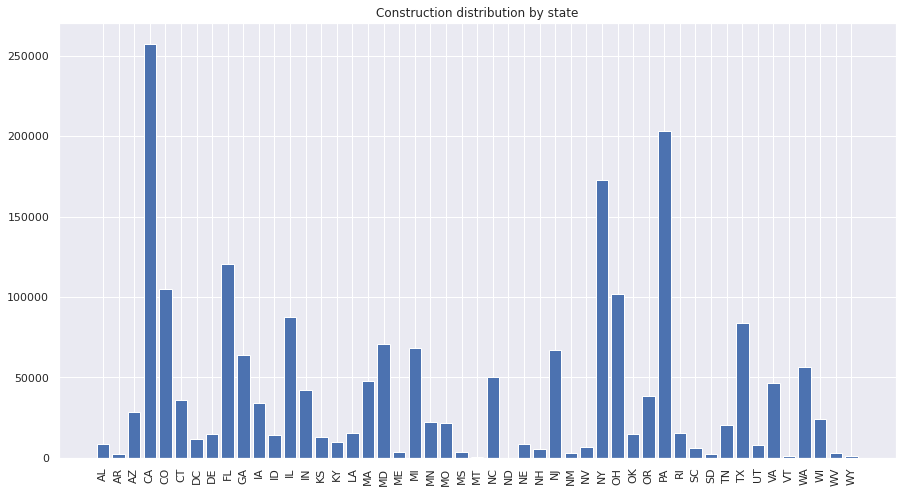

In [83]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count['State'], height=df_state_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state")
plt.savefig("construction_distribution_by_state.png")

In [130]:
df_state_count_sorted = df_state_count.sort_values(by=['counts'], ascending=False)

In [131]:
df_state_count_sorted.head(10)

,State,counts
3,CA,257466
36,PA,203070
32,NY,172605
8,FL,120505
4,CO,104827
33,OH,101614
12,IL,87744
41,TX,83797
18,MD,70558
20,MI,68398


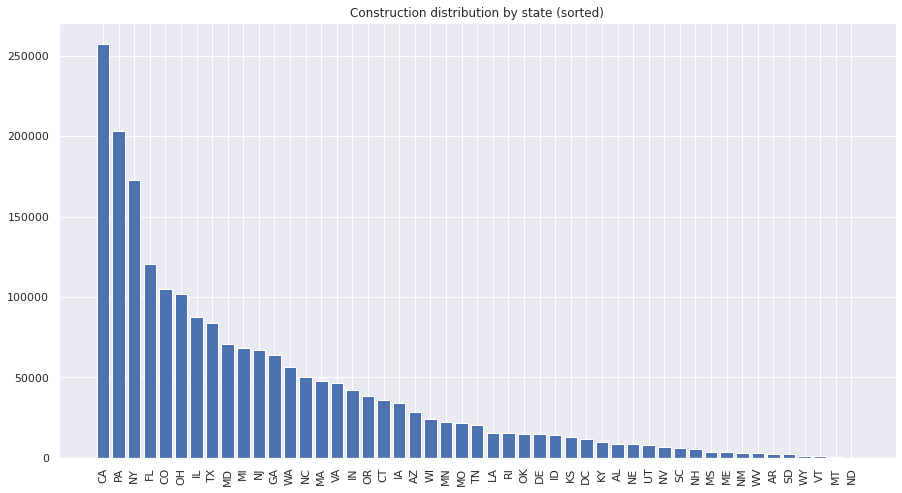

In [132]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_sorted['State'], height=df_state_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state (sorted)")
plt.savefig("construction_distribution_by_state_sorted.png")

In [96]:
df_state_MapQuest = df_state[df_state.Source == "MapQuest"]

In [97]:
df_state_MapQuest.head

<bound method NDFrame.head of                 Id    Source State
0       M-12687617  MapQuest    CA
1       M-12687618  MapQuest    CA
2       M-12687619  MapQuest    CA
3       M-12687620  MapQuest    CA
4       M-12687621  MapQuest    CA
...            ...       ...   ...
205495   M-5038207  MapQuest    CO
205496   M-5038209  MapQuest    CO
205497   M-5038212  MapQuest    CO
205498   M-5038213  MapQuest    CO
205499   M-5038222  MapQuest    CO

[205500 rows x 3 columns]>

In [99]:
df_state_MapQuest_group = df_state_MapQuest.groupby("State")

In [100]:
df_state_MapQuest_group.head()

,Id,Source,State
0,M-12687617,MapQuest,CA
1,M-12687618,MapQuest,CA
2,M-12687619,MapQuest,CA
3,M-12687620,MapQuest,CA
4,M-12687621,MapQuest,CA
...,...,...,...
79924,M-9203592,MapQuest,ND
79925,M-9203593,MapQuest,ND
86444,M-8856587,MapQuest,DC
95806,M-8339091,MapQuest,DC


In [101]:
df_state_MapQuest_group_count = df_state_MapQuest_group.size().reset_index(name='counts')

In [103]:
df_state_MapQuest_group_count.head()

,State,counts
0,AL,1381
1,AR,28
2,AZ,5793
3,CA,28808
4,CO,14290


In [133]:
df_state_MapQuest_group_count_sorted = df_state_MapQuest_group_count.sort_values(by=['counts'], ascending=False)

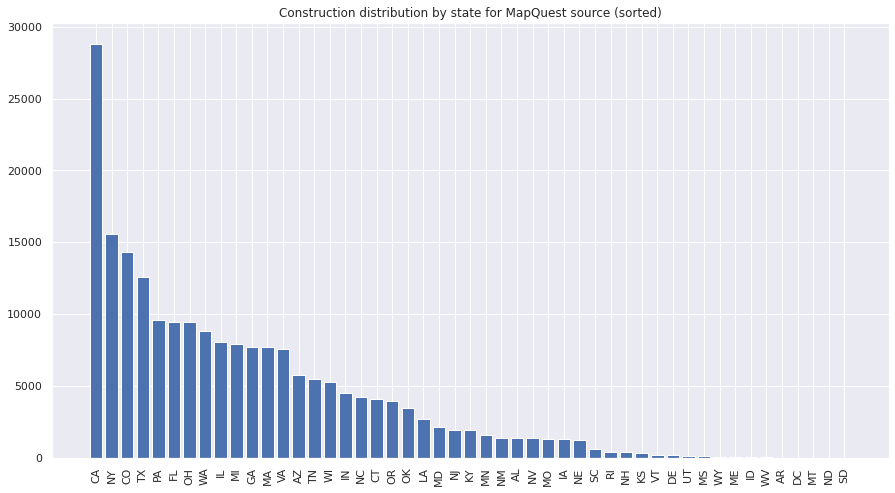

In [134]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_MapQuest_group_count_sorted['State'], height=df_state_MapQuest_group_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for MapQuest source (sorted)")
plt.savefig("construction_distribution_by_state_MapQuest_sorted.png")

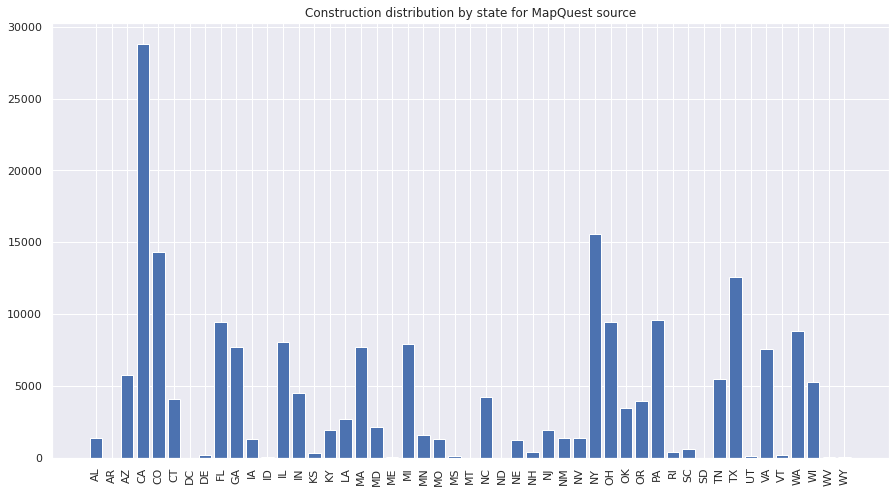

In [105]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_MapQuest_group_count['State'], height=df_state_MapQuest_group_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for MapQuest source")
plt.savefig("construction_distribution_by_state_MapQuest.png")

In [108]:
df_state_Bing = df_state[df_state.Source != "MapQuest"]

In [110]:
df_state_Bing.head(-10)

,Id,Source,State
205500,NaN,NaN,WI
205501,NaN,NaN,WI
205502,NaN,NaN,WI
205503,NaN,NaN,WI
205504,NaN,NaN,WI
...,...,...,...
2045985,NaN,NaN,MI
2045986,NaN,NaN,OH
2045987,NaN,NaN,OH
2045988,NaN,NaN,IN


In [111]:
df_state_Bing_group = df_state_Bing.groupby("State")

In [112]:
df_state_Bing_group.head()

,Id,Source,State
205500,NaN,NaN,WI
205501,NaN,NaN,WI
205502,NaN,NaN,WI
205503,NaN,NaN,WI
205504,NaN,NaN,WI
...,...,...,...
238234,NaN,NaN,RI
243146,NaN,NaN,RI
243147,NaN,NaN,RI
243347,NaN,NaN,RI


In [113]:
df_state_Bing_group_count = df_state_Bing_group.size().reset_index(name='counts')

In [114]:
df_state_Bing_group_count.head()

,State,counts
0,AL,7541
1,AR,2524
2,AZ,22803
3,CA,228658
4,CO,90537


In [135]:
df_state_Bing_group_count_sorted = df_state_Bing_group_count.sort_values(by=['counts'], ascending=False)

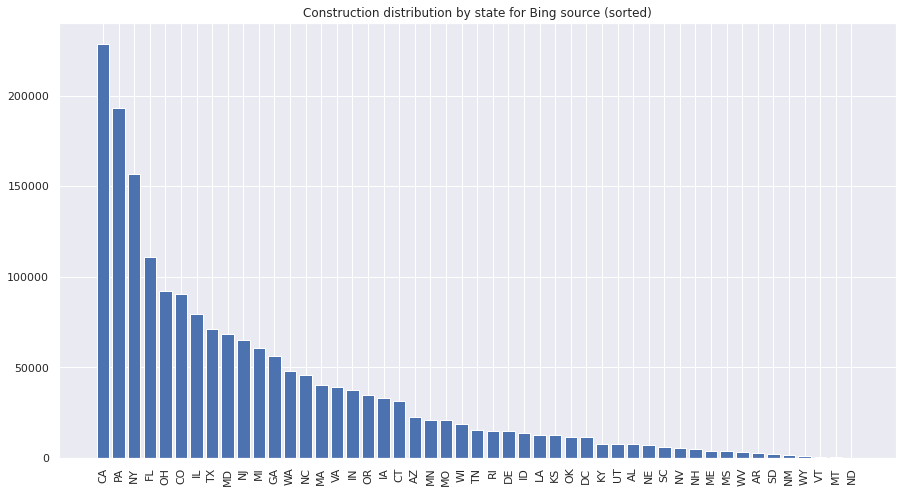

In [136]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_Bing_group_count_sorted['State'], height=df_state_Bing_group_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for Bing source (sorted)")
plt.savefig("construction_distribution_by_state_Bing_sorted.png")

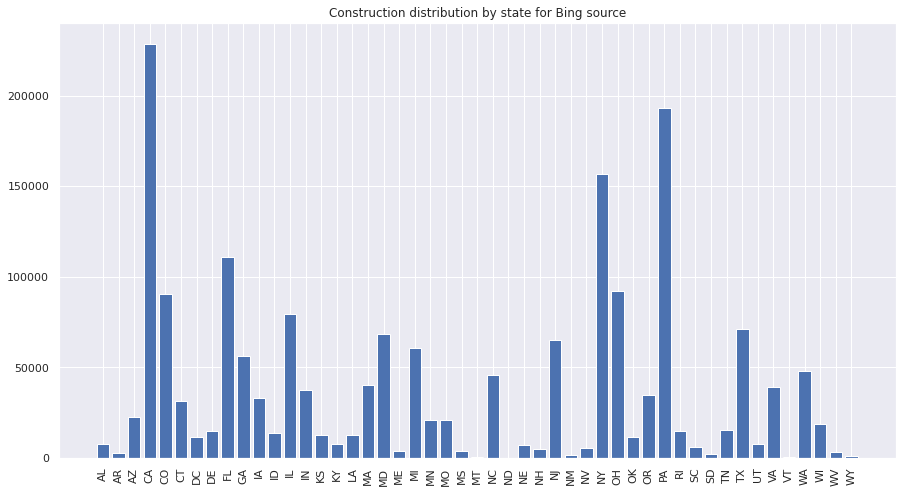

In [115]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_Bing_group_count['State'], height=df_state_Bing_group_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for Bing source")
plt.savefig("construction_distribution_by_state_Bing.png")

In [116]:
df_city = df.loc[:, df.columns.intersection(['City', 'State', "Id", "Source"])]

In [117]:
df_city.head()

,Id,Source,City,State
0,M-12687617,MapQuest,La Jolla,CA
1,M-12687618,MapQuest,San Diego,CA
2,M-12687619,MapQuest,San Diego,CA
3,M-12687620,MapQuest,San Diego,CA
4,M-12687621,MapQuest,San Diego,CA


In [118]:
df_city_group = df_city.groupby("City")

In [119]:
df_city_group.head()

,Id,Source,City,State
0,M-12687617,MapQuest,La Jolla,CA
1,M-12687618,MapQuest,San Diego,CA
2,M-12687619,MapQuest,San Diego,CA
3,M-12687620,MapQuest,San Diego,CA
4,M-12687621,MapQuest,San Diego,CA
...,...,...,...,...
205277,M-5034449,MapQuest,Foristell,MO
205317,M-5034694,MapQuest,Dakota,MN
205324,M-5035061,MapQuest,Lake Saint Louis,MO
205383,M-5036680,MapQuest,Elkmont,AL


In [120]:
df_city_group_count = df_city_group.size().reset_index(name='counts')

In [124]:
df_city_group_count.head()

,City,counts
0,Abbeville,4
1,Abbotsford,8
2,Abbott,7
3,Aberdeen,23
4,Abernathy,3


In [127]:
df_city_group_count_sorted = df_city_group_count.sort_values(by=['counts'], ascending=False)

In [129]:
df_city_group_count_sorted.head(20)

,City,counts
1735,Denver,4231
5340,Phoenix,3877
1296,Cleveland,3297
266,Atlanta,2663
3910,Los Angeles,2432
677,Boston,2297
6032,San Diego,2279
5021,Oklahoma City,2133
4315,Miami,2070
6712,Tacoma,2032


In [237]:
population_path = "/home/amin/CETI/RoadConstruction/StatesPopulation.csv"

In [238]:
population_data = read_data(population_path)

In [239]:
population_data.head()

,Rank,State,July2019Estimate,PercentOfTotal,StateShort,LandArea(KM2)
0,1,California,39512223,11.91%,CA,403466
1,2,Texas,28995881,8.74%,TX,676587
2,3,Florida,21477737,6.47%,FL,138887
3,4,New York,19453561,5.86%,NY,122057
4,5,Illinois,12671821,3.86%,IL,143793


In [240]:
population_data["NewState"] = population_data["StateShort"]
population_data = population_data.drop("State", axis=1)

In [241]:
population_data.head()

,Rank,July2019Estimate,PercentOfTotal,StateShort,LandArea(KM2),NewState
0,1,39512223,11.91%,CA,403466,CA
1,2,28995881,8.74%,TX,676587,TX
2,3,21477737,6.47%,FL,138887,FL
3,4,19453561,5.86%,NY,122057,NY
4,5,12671821,3.86%,IL,143793,IL


In [242]:
df_state_count_population = df_state_count_sorted.set_index('State').join(population_data.set_index('StateShort'))

In [243]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState
State,,,,,,
CA,257466,1,39512223,11.91%,403466,CA
PA,203070,6,12801989,3.82%,115883,PA
NY,172605,4,19453561,5.86%,122057,NY
FL,120505,3,21477737,6.47%,138887,FL
CO,104827,21,5758736,1.74%,268431,CO


In [244]:
df_state_count_population["C_P_Rate"] = df_state_count_population["counts"] / df_state_count_population["July2019Estimate"]
df_state_count_population["P_C_Rate"] = df_state_count_population["July2019Estimate"] / df_state_count_population["counts"]

In [245]:
# df_state_count_sorted_population = df_state_count_sorted_population.astype({"Rate": int})

In [246]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState,C_P_Rate,P_C_Rate
State,,,,,,,,
CA,257466,1,39512223,11.91%,403466,CA,0.006516,153.465790
PA,203070,6,12801989,3.82%,115883,PA,0.015862,63.042247
NY,172605,4,19453561,5.86%,122057,NY,0.008873,112.705663
FL,120505,3,21477737,6.47%,138887,FL,0.005611,178.231086
CO,104827,21,5758736,1.74%,268431,CO,0.018203,54.935618


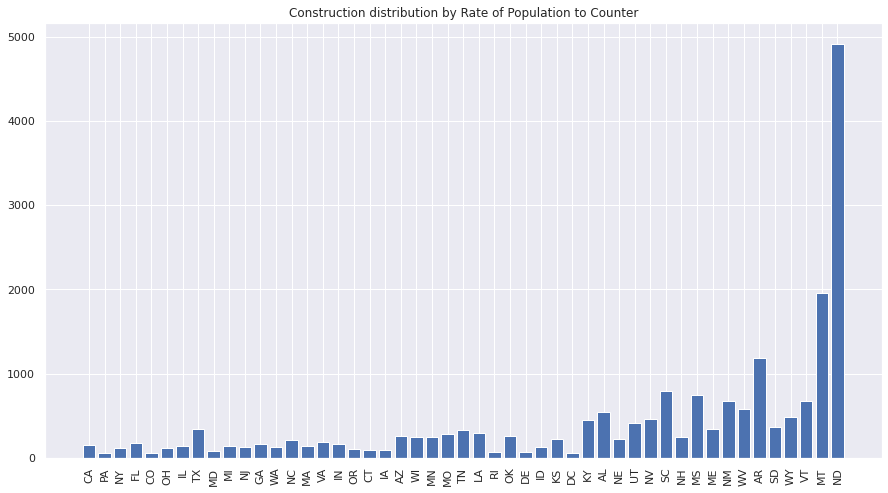

In [247]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['P_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Counter")
plt.savefig("construction_distribution_by_Rate_Population_Counter.png")

In [248]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['P_C_Rate'], ascending=False)

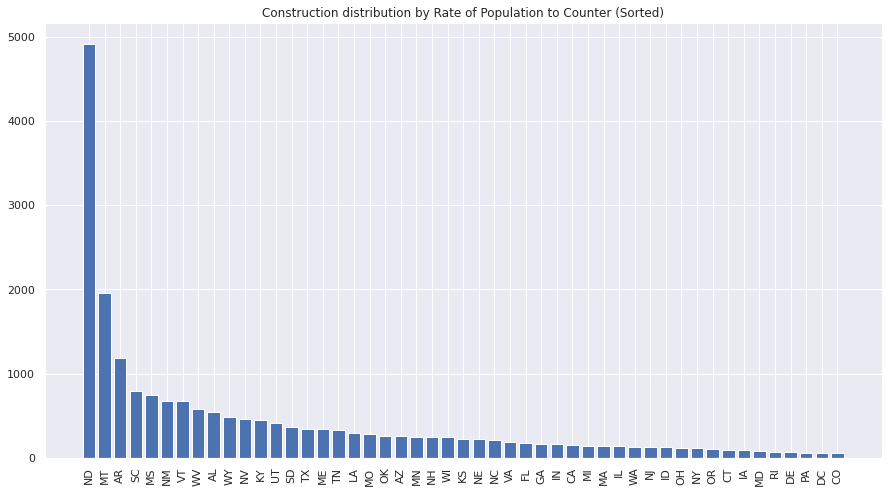

In [249]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['P_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Counter (Sorted)")
plt.savefig("construction_distribution_by_Rate_Population_Counter_sorted.png")

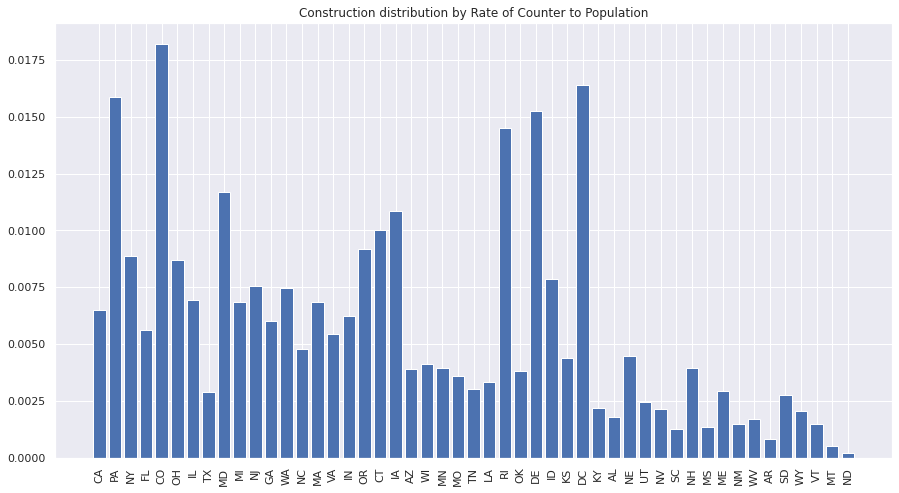

In [250]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['C_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Population")
plt.savefig("construction_distribution_by_Rate_Counter_Population.png")

In [251]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['C_P_Rate'], ascending=False)

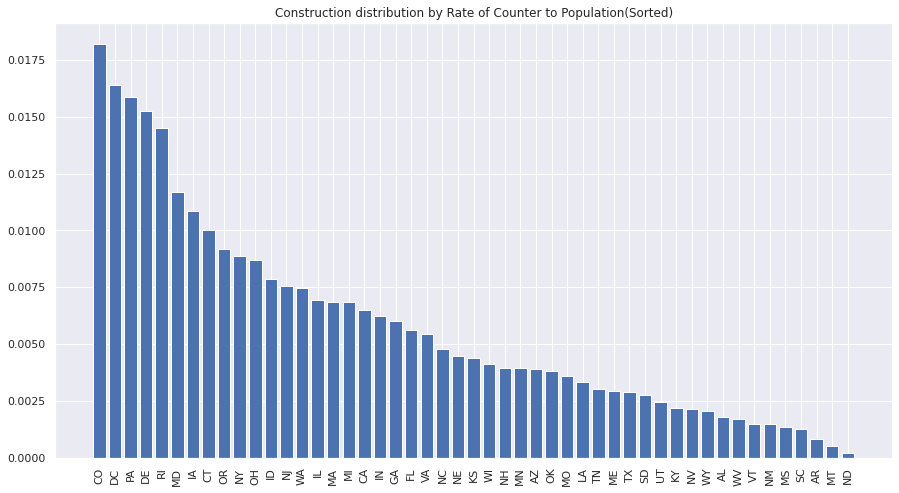

In [252]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['C_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Population(Sorted)")
plt.savefig("construction_distribution_by_Rate_Counter_Population_sorted.png")

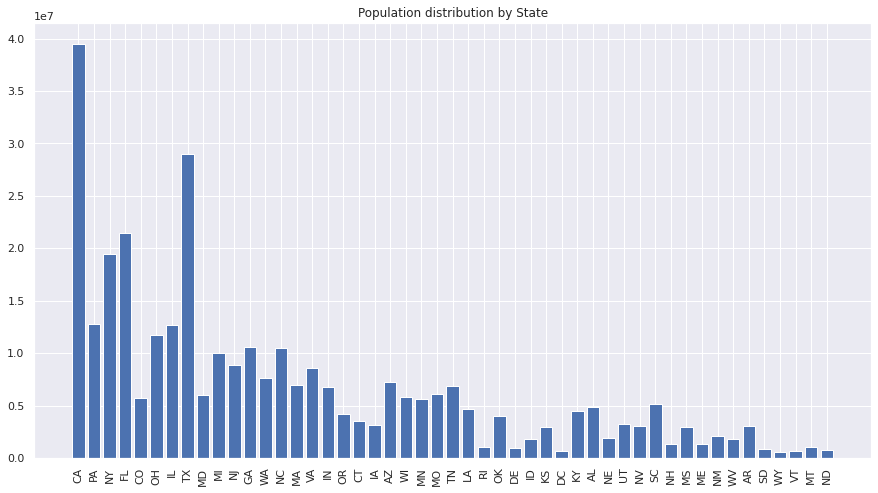

In [253]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['July2019Estimate'])
a = plt.xticks(rotation = 90)
plt.title("Population distribution by State")
plt.savefig("Population_distribution_by_State.png")

In [254]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['July2019Estimate'], ascending=False)

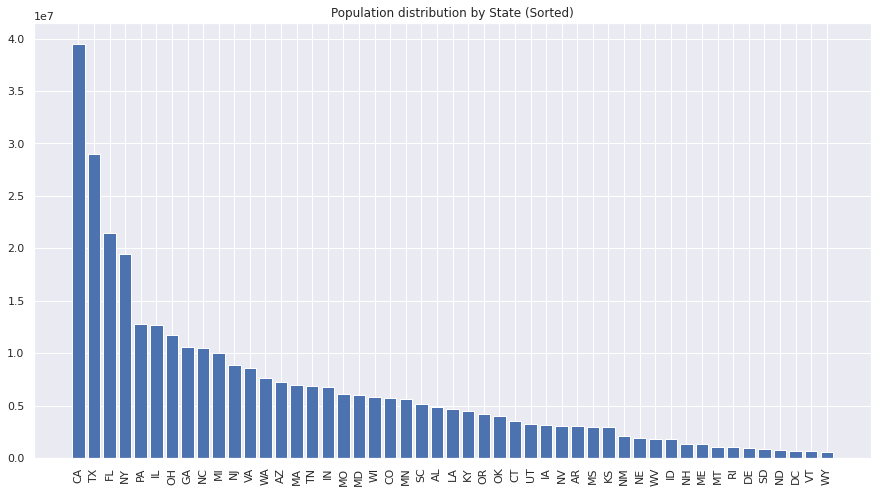

In [255]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['July2019Estimate'])
a = plt.xticks(rotation = 90)
plt.title("Population distribution by State (Sorted)")
plt.savefig("Population_distribution_by_State_Sorted.png")

In [256]:
df_state_count_population["C_A_Rate"] = df_state_count_population["counts"] / df_state_count_population["LandArea(KM2)"]
df_state_count_population["A_C_Rate"] = df_state_count_population["LandArea(KM2)"] / df_state_count_population["counts"]

In [257]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState,C_P_Rate,P_C_Rate,C_A_Rate,A_C_Rate
State,,,,,,,,,,
CA,257466,1,39512223,11.91%,403466,CA,0.006516,153.465790,0.638136,1.567065
PA,203070,6,12801989,3.82%,115883,PA,0.015862,63.042247,1.752371,0.570655
NY,172605,4,19453561,5.86%,122057,NY,0.008873,112.705663,1.414134,0.707146
FL,120505,3,21477737,6.47%,138887,FL,0.005611,178.231086,0.867648,1.152541
CO,104827,21,5758736,1.74%,268431,CO,0.018203,54.935618,0.390517,2.560705


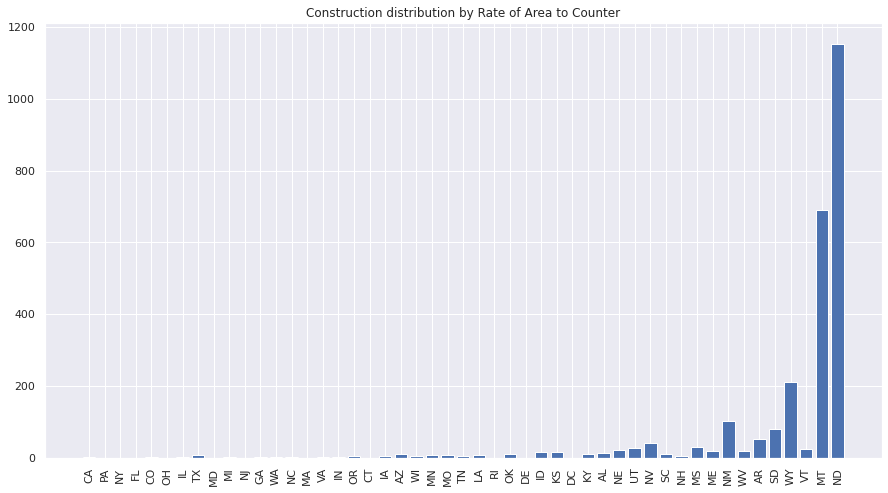

In [258]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['A_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Counter")
plt.savefig("construction_distribution_by_Rate_Area_Counter.png")

In [259]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['A_C_Rate'], ascending=False)

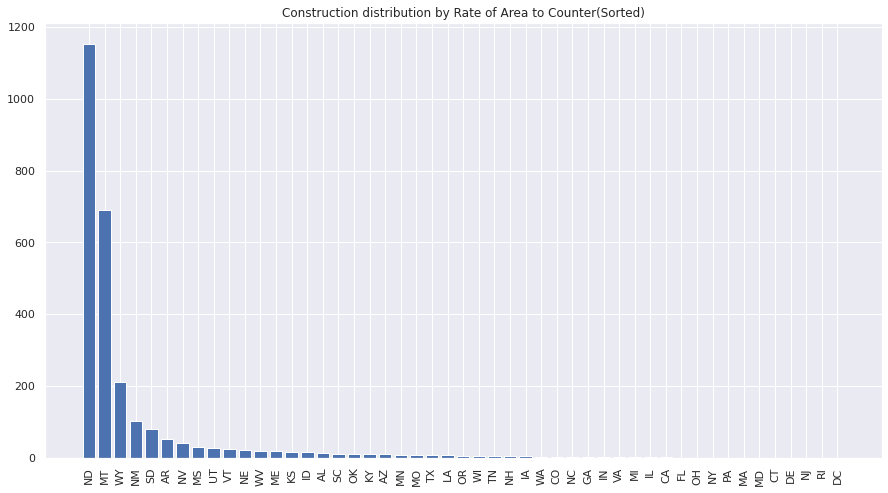

In [260]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['A_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Counter(Sorted)")
plt.savefig("construction_distribution_by_Rate_Area_Counter_sorted.png")

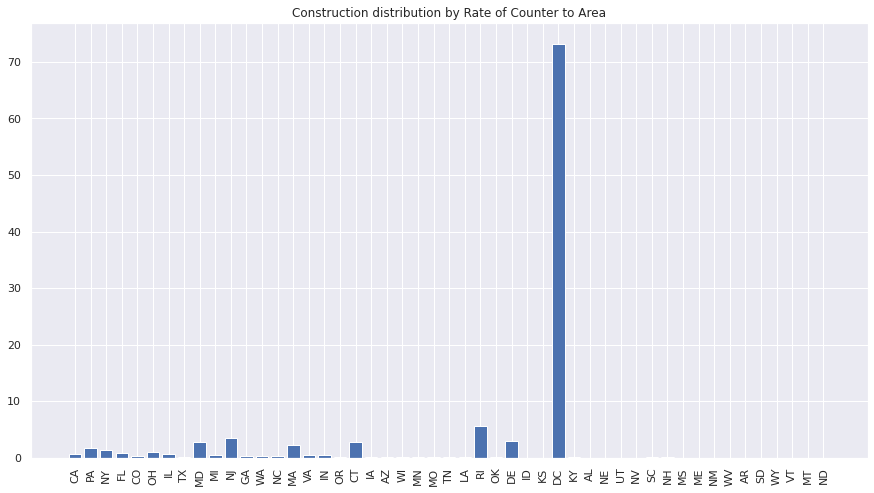

In [261]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['C_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Area")
plt.savefig("construction_distribution_by_Rate_Counter_Area.png")

In [262]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['C_A_Rate'], ascending=False)

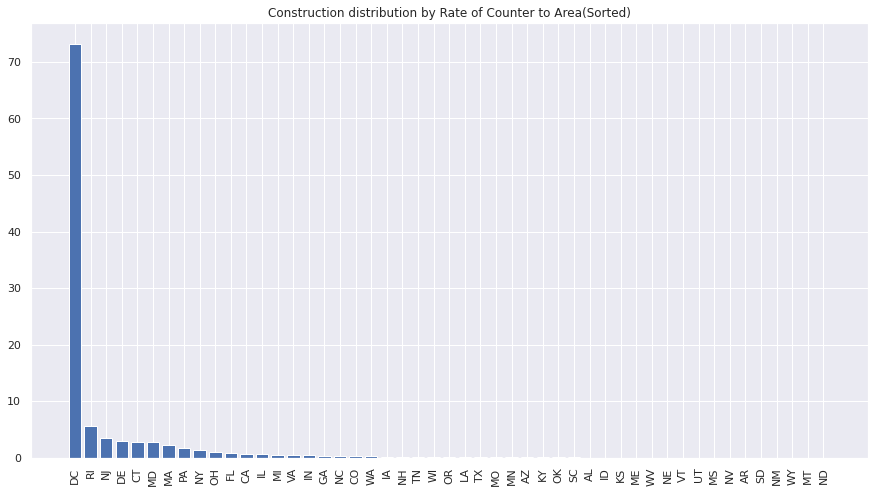

In [264]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['C_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Area(Sorted)")
plt.savefig("construction_distribution_by_Rate_Counter_Area_sorted.png")

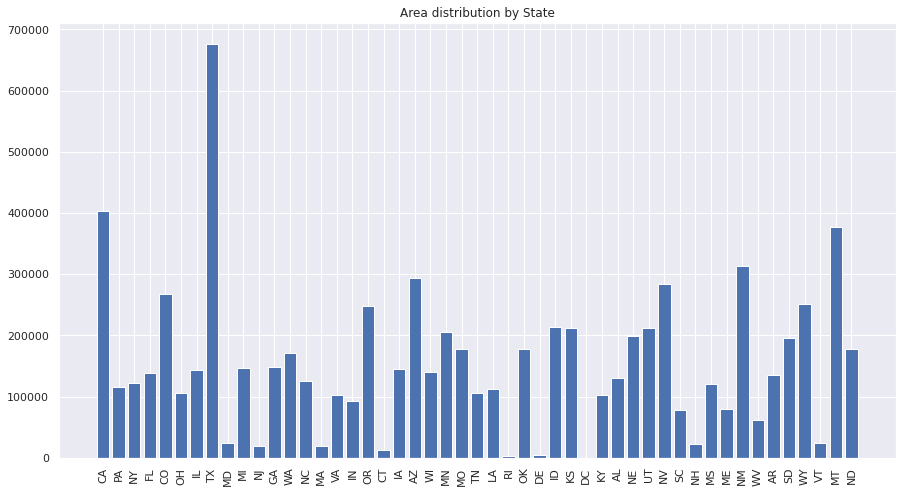

In [265]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['LandArea(KM2)'])
a = plt.xticks(rotation = 90)
plt.title("Area distribution by State")
plt.savefig("Area_distribution_by_State.png")

In [266]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['LandArea(KM2)'], ascending=False)

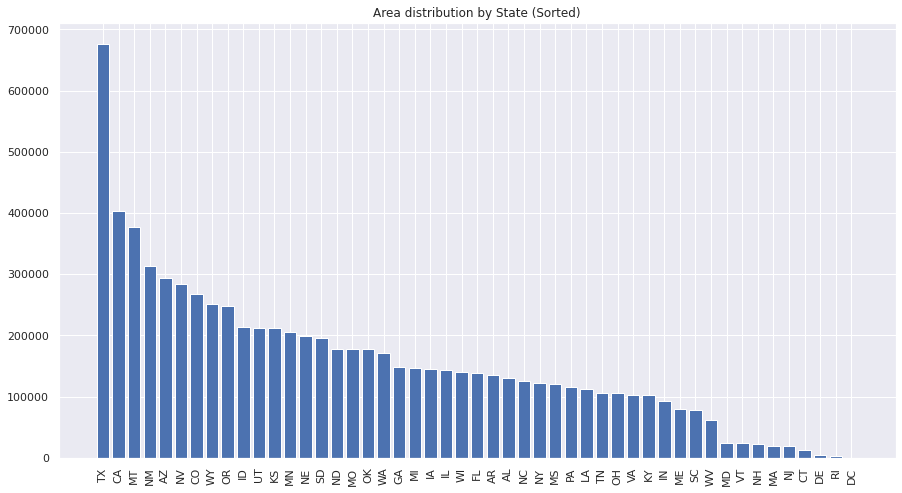

In [267]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['LandArea(KM2)'])
a = plt.xticks(rotation = 90)
plt.title("Area distribution by State (Sorted)")
plt.savefig("Area_distribution_by_State_Sorted.png")

In [268]:
df_state_count_population["P_A_Rate"] = df_state_count_population["July2019Estimate"] / df_state_count_population["LandArea(KM2)"]
df_state_count_population["A_P_Rate"] = df_state_count_population["LandArea(KM2)"] / df_state_count_population["July2019Estimate"]

In [269]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState,C_P_Rate,P_C_Rate,C_A_Rate,A_C_Rate,P_A_Rate,A_P_Rate
State,,,,,,,,,,,,
CA,257466,1,39512223,11.91%,403466,CA,0.006516,153.465790,0.638136,1.567065,97.931977,0.010211
PA,203070,6,12801989,3.82%,115883,PA,0.015862,63.042247,1.752371,0.570655,110.473400,0.009052
NY,172605,4,19453561,5.86%,122057,NY,0.008873,112.705663,1.414134,0.707146,159.380953,0.006274
FL,120505,3,21477737,6.47%,138887,FL,0.005611,178.231086,0.867648,1.152541,154.641810,0.006467
CO,104827,21,5758736,1.74%,268431,CO,0.018203,54.935618,0.390517,2.560705,21.453319,0.046613


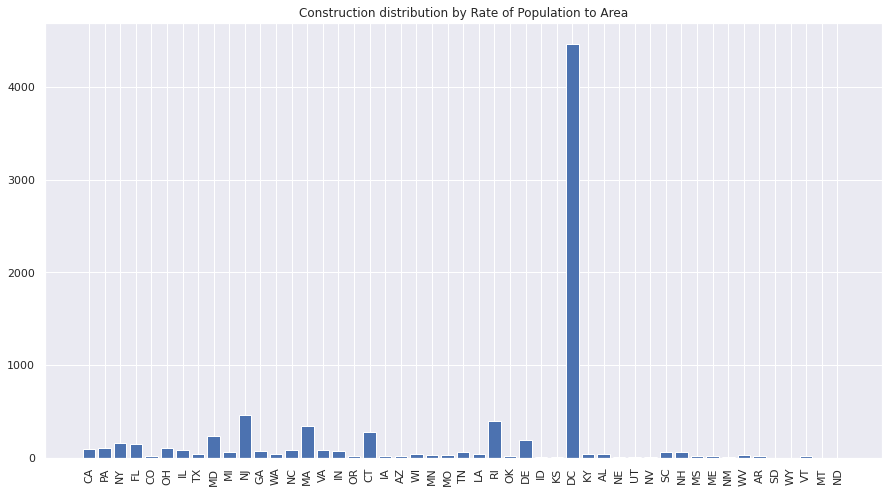

In [270]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['P_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Area")
plt.savefig("construction_distribution_by_Rate_Population_Area.png")

In [271]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['P_A_Rate'], ascending=False)

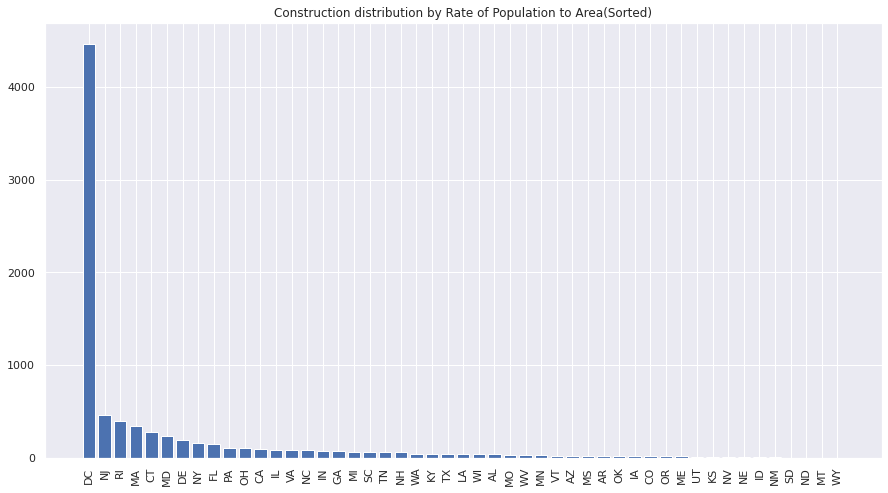

In [273]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['P_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Area(Sorted)")
plt.savefig("construction_distribution_by_Rate_Population_Area_Sorted.png")

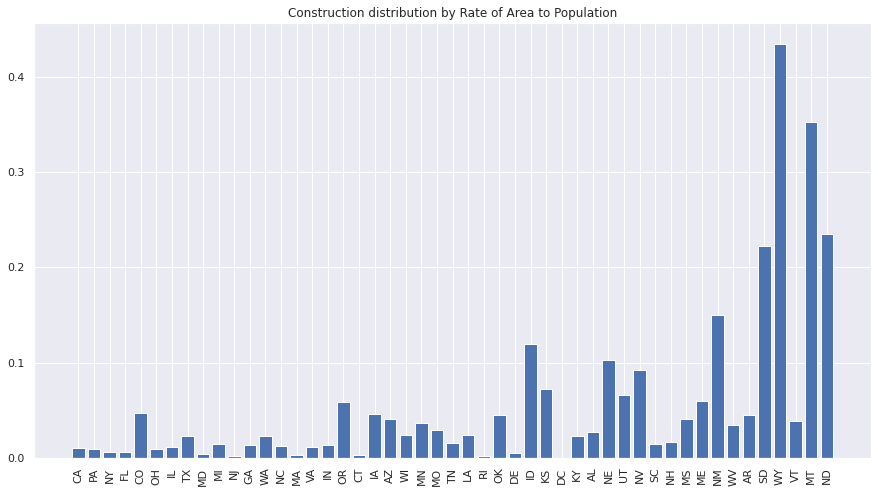

In [274]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['A_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Population")
plt.savefig("construction_distribution_by_Rate_Area_Population.png")

In [275]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['A_P_Rate'], ascending=False)

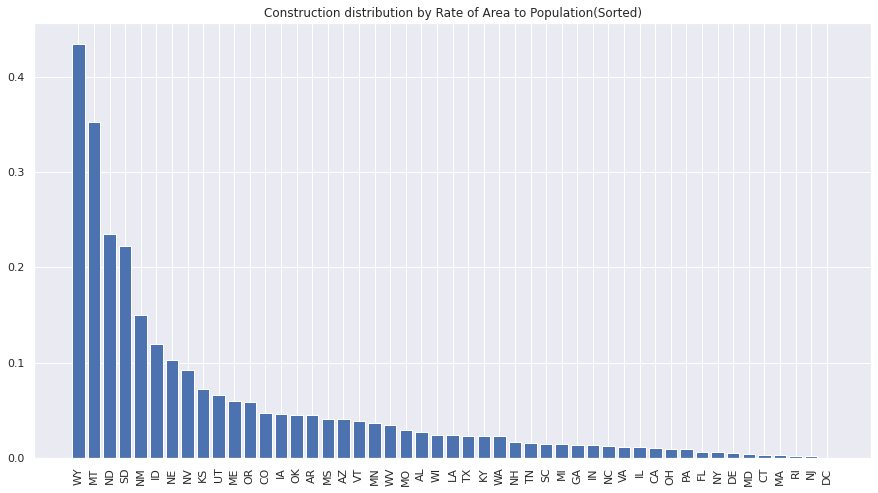

In [276]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['A_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Population(Sorted)")
plt.savefig("construction_distribution_by_Rate_Area_Population_sorted.png")